# Proyek Analisis Data: E-Commerce Public
- **Nama:** Rizky Hilmianto
- **Email:** rizkyhilmianto@gmail.com
- **ID Dicoding:** rizky_hilmianto_2gHC

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Negara bagian (state) mana yang memiliki jumlah seller tertinggi dan terendah? serta bagaimana sebarannya?
- Pertanyaan 2 : Kategori produk apa yang paling banyak dan paling sedikit terjual berdasarkan data penjualan?
- Pertanyaan 3 : Kategori produk apa yang memiliki review score tertinggi dan terendah?
- Pertanyaan 4 : Negara bagian (state) mana yang memiliki jumlah customer tertinggi dan terendah? serta bagaimana sebarannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Import data sellers

In [ ]:
#import data sellers:
sellers_df = pd.read_csv('/content/sellers_dataset.csv')
sellers_df = sellers_df[['seller_id', 'seller_city', 'seller_state']]
sellers_df.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


Insight:
*   Mengeliminasi kolom yang tidak saya butuhkan dan hanya memasukkan kolom yang saya butuhkan untuk analisis


Import data products

In [ ]:
#import data prodcts:
products_df = pd.read_csv('/content/products_dataset.csv')
products_df = products_df[['product_id', 'product_category_name']]
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


Insight:

*   Mengeliminasi kolom yang tidak saya butuhkan dan hanya memasukkan kolom yang saya butuhkan untuk analisis



Import data product_translate

In [ ]:
#import data product translate:
products_translate_df = pd.read_csv('/content/product_category_name_translation.csv')
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Import data orders

In [ ]:
#import data orders:
orders_df = pd.read_csv('/content/orders_dataset.csv')
orders_df = orders_df[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']]
orders_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02


Insight:

*   Mengeliminasi kolom yang tidak saya butuhkan dan hanya memasukkan kolom yang saya butuhkan untuk analisis

Import data order_review

In [ ]:
#import data order_review:
order_review_df = pd.read_csv('/content/order_reviews_dataset.csv')
order_review_df = order_review_df[['order_id', 'review_score']]
order_review_df.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


Insight:

*   Mengeliminasi kolom yang tidak saya butuhkan dan hanya memasukkan kolom yang saya butuhkan untuk analisis



Import data customer

In [ ]:
#import data customer:
customers_df = pd.read_csv('/content/customers_dataset.csv')
customers_df = customers_df[['customer_id', 'customer_city', 'customer_state']]
customers_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


Insight:
- Mengeliminasi kolom yang tidak saya butuhkan dan hanya memasukkan kolom yang saya butuhkan untuk analisis

Import data order_items

In [ ]:
#import data order_items:
order_items_df = pd.read_csv('/content/order_items_dataset.csv')
order_items_df = order_items_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']]
order_items_df.head()

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


Insight:


*   Mengeliminasi kolom yang tidak saya butuhkan dan hanya memasukkan kolom yang saya butuhkan untuk analisis



### Menggabungkan tabel - tabel agar menjadi satu tabel final

Menggabungkan tabel products_df & products_translate_df menjadi products_full_df

In [ ]:
#menggabungkan tabel products_df & products_translate_df menjadi products_full_df
products_full_df = pd.merge(
    left=products_df,
    right=products_translate_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_full_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


Insight:



*   Saya menggabungkan dua tabel (products_df dan product_translate_df) karena saya membutuhkan kolom kategori produk dengan bahasa inggris



Menggabungkan tabel orders_df, order_review_df, dan customer_df menjadi order_customer_full_df

In [ ]:
# menggabungkan tabel orders_df, order_review_df, dan customer_df menjadi order_customer_full_df

# Gabungkan ketiga tabel sekaligus
order_customer_full_df = pd.merge(
    pd.merge(orders_df, order_review_df, on='order_id'),
    customers_df, on='customer_id'
)
order_customer_full_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,review_score,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,4,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,4,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,5,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,5,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,5,santo andre,SP


Insight:


*   Saya menggabungkan tiga tabel (orders_df, order_review_df, dan customer_df) sebelum masuk tahap assessing agar ketika assessing dan cleaning tidak terjadi double cleaning. sehingga yang saya assessing dan cleaning cukup tabel gabungan ini saja



Menggabungkan seluruh tabel yang diperlukan untuk menjadi final tabel (order_items_df, sellers_df, products_full_df, order_customer_full_df) menjadi final_df


In [ ]:
#menggabungkan seluruh tabel yang diperlukan untuk menjadi final tabel (order_items_df, sellers_df, products_full_df, order_customer_full_df) menjadi final_df

final_df = pd.merge(pd.merge(
    pd.merge(order_items_df, products_full_df, on='product_id'),
    order_customer_full_df, on='order_id'), sellers_df, on='seller_id'
)
final_df.head()


,order_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,review_score,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,5,campos dos goytacazes,RJ,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,4,santa fe do sul,SP,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,5,para de minas,MG,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,4,atibaia,SP,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,5,varzea paulista,SP,loanda,PR


Insight

*   saya menggabungkan seluruh tabel di sesi ini agar ketika melakukan assesing & cleaning data tidak terjadi double cleaning
*   selain itu, menurut saya ini akan lebih memudahkan saya untuk analisis kedepannya



Mengurutkan kolom sesuai dengan yang diperlukan

In [ ]:
# Urutan kolom yang diinginkan
new_column_order = [
    'order_id', 'product_id', 'customer_id', 'product_category_name', 'product_category_name_english',
    'price', 'freight_value', 'order_purchase_timestamp', 'order_approved_at',
    'customer_city', 'customer_state', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'review_score', 'seller_id', 'seller_city', 'seller_state'
]

# Mengatur ulang kolom dalam final_df sesuai dengan urutan yang diinginkan
final_df_reordered = final_df[new_column_order]
final_df = final_df_reordered

# Tampilkan hasilnya
final_df.head()

,order_id,product_id,customer_id,product_category_name,product_category_name_english,price,freight_value,order_purchase_timestamp,order_approved_at,customer_city,customer_state,order_delivered_carrier_date,order_delivered_customer_date,review_score,seller_id,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,cool_stuff,cool_stuff,58.90,13.29,2017-09-13 08:59:02,2017-09-13 09:45:35,campos dos goytacazes,RJ,2017-09-19 18:34:16,2017-09-20 23:43:48,5,48436dade18ac8b2bce089ec2a041202,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,pet_shop,pet_shop,239.90,19.93,2017-04-26 10:53:06,2017-04-26 11:05:13,santa fe do sul,SP,2017-05-04 14:35:00,2017-05-12 16:04:24,4,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,furniture_decor,199.00,17.87,2018-01-14 14:33:31,2018-01-14 14:48:30,para de minas,MG,2018-01-16 12:36:48,2018-01-22 13:19:16,5,5b51032eddd242adc84c38acab88f23d,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,perfumaria,perfumery,12.99,12.79,2018-08-08 10:00:35,2018-08-08 10:10:18,atibaia,SP,2018-08-10 13:28:00,2018-08-14 13:32:39,4,9d7a1d34a5052409006425275ba1c2b4,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,garden_tools,199.90,18.14,2017-02-04 13:57:51,2017-02-04 14:10:13,varzea paulista,SP,2017-02-16 09:46:09,2017-03-01 16:42:31,5,df560393f3a51e74553ab94004ba5c87,loanda,PR


insight:

*   Disini saya mengatur berbagai kolom menjadi sesuai dengan urutan yang saya mau. hal tersebut saya lakukan agar saya mudah untuk menganalisis kedepannya



### Assessing Data

Menilai Tabel final_df

In [ ]:
#melihat tipe data dari masing - masing kolom
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   product_id                     112372 non-null  object 
 2   customer_id                    112372 non-null  object 
 3   product_category_name          110774 non-null  object 
 4   product_category_name_english  110750 non-null  object 
 5   price                          112372 non-null  float64
 6   freight_value                  112372 non-null  float64
 7   order_purchase_timestamp       112372 non-null  object 
 8   order_approved_at              112357 non-null  object 
 9   customer_city                  112372 non-null  object 
 10  customer_state                 112372 non-null  object 
 11  order_delivered_carrier_date   111188 non-null  object 
 12  order_delivered_customer_date 

In [ ]:
#melihat data yang duplicate
print('Jumlah data duplikat: ', final_df.duplicated().sum())

Jumlah data duplikat:  10517


In [ ]:
#melihat data yang missing value
final_df.isna().sum()

,0
order_id,0
product_id,0
customer_id,0
product_category_name,1598
product_category_name_english,1622
price,0
freight_value,0
order_purchase_timestamp,0
order_approved_at,15
customer_city,0


**Insight:**

*   Disini terlihat bahwa masih terdapat kolom dengan tipe data yang tidak sesuai (kolom date, dsb) harusnya tipe datanya datetime. maka nanti akan saya ubah tipe datanya agar sesuai
*   Disini terdeteksi bahwa masih terdapat data yang mengandung missing value & duplikat. dalam analisis ini, saya ingin memakai data yang benar - benar bersih. sehingga saya akan melakukan dropping data yang mengandung missing value. hal itu dengan pertimbangan bahwa data yang saya miliki masih jauh lebih banyak dibanding data yang akan saya drop, sehingga saya merasa hal tersebut tidak apa apa



### Cleaning Data

Merubah tipe data menjadi Datetime

In [ ]:
#mengubah tipe data menjadi datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
    'order_delivered_customer_date']

for column in datetime_columns:
  final_df[column] = pd.to_datetime(final_df[column])

<ipython-input-27-50c9e1103650>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[column] = pd.to_datetime(final_df[column])
<ipython-input-27-50c9e1103650>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[column] = pd.to_datetime(final_df[column])
<ipython-input-27-50c9e1103650>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
#melakukan pengecekkan tipe data
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108442 entries, 0 to 112371
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108442 non-null  object        
 1   product_id                     108442 non-null  object        
 2   customer_id                    108442 non-null  object        
 3   product_category_name          108442 non-null  object        
 4   product_category_name_english  108442 non-null  object        
 5   price                          108442 non-null  float64       
 6   freight_value                  108442 non-null  float64       
 7   order_purchase_timestamp       108442 non-null  datetime64[ns]
 8   order_approved_at              108442 non-null  datetime64[ns]
 9   customer_city                  108442 non-null  object        
 10  customer_state                 108442 non-null  object        
 11  order

Melakukan Dropping pada missing value

In [ ]:
#membersihkan data yang mengandung missing value:
final_df = final_df.dropna()
final_df.isna().sum()

,0
order_id,0
product_id,0
customer_id,0
product_category_name,0
product_category_name_english,0
price,0
freight_value,0
order_purchase_timestamp,0
order_approved_at,0
customer_city,0


Melihat data duplikat & melakukan dropping khusus duplicate pada kolom 'order_id'

In [ ]:
for column in final_df.columns:
    duplicates = final_df[column].duplicated().sum()
    print(f"Kolom '{column}' memiliki {duplicates} data duplikat.")

Kolom 'order_id' memiliki 13969 data duplikat.
Kolom 'product_id' memiliki 76967 data duplikat.
Kolom 'customer_id' memiliki 13969 data duplikat.
Kolom 'product_category_name' memiliki 108371 data duplikat.
Kolom 'product_category_name_english' memiliki 108371 data duplikat.
Kolom 'price' memiliki 102668 data duplikat.
Kolom 'freight_value' memiliki 101562 data duplikat.
Kolom 'order_purchase_timestamp' memiliki 14466 data duplikat.
Kolom 'order_approved_at' memiliki 21869 data duplikat.
Kolom 'customer_city' memiliki 104371 data duplikat.
Kolom 'customer_state' memiliki 108415 data duplikat.
Kolom 'order_delivered_carrier_date' memiliki 30027 data duplikat.
Kolom 'order_delivered_customer_date' memiliki 14753 data duplikat.
Kolom 'review_score' memiliki 108437 data duplikat.
Kolom 'seller_id' memiliki 105535 data duplikat.
Kolom 'seller_city' memiliki 107855 data duplikat.
Kolom 'seller_state' memiliki 108420 data duplikat.


In [ ]:
final_df = final_df.drop_duplicates(subset='order_id')

for column in final_df.columns:
    duplicates = final_df[column].duplicated().sum()
    print(f"Kolom '{column}' memiliki {duplicates} data duplikat.")

Kolom 'order_id' memiliki 0 data duplikat.
Kolom 'product_id' memiliki 64025 data duplikat.
Kolom 'customer_id' memiliki 0 data duplikat.
Kolom 'product_category_name' memiliki 94402 data duplikat.
Kolom 'product_category_name_english' memiliki 94402 data duplikat.
Kolom 'price' memiliki 88781 data duplikat.
Kolom 'freight_value' memiliki 87850 data duplikat.
Kolom 'order_purchase_timestamp' memiliki 497 data duplikat.
Kolom 'order_approved_at' memiliki 7900 data duplikat.
Kolom 'customer_city' memiliki 90402 data duplikat.
Kolom 'customer_state' memiliki 94446 data duplikat.
Kolom 'order_delivered_carrier_date' memiliki 16058 data duplikat.
Kolom 'order_delivered_customer_date' memiliki 784 data duplikat.
Kolom 'review_score' memiliki 94468 data duplikat.
Kolom 'seller_id' memiliki 91577 data duplikat.
Kolom 'seller_city' memiliki 93886 data duplikat.
Kolom 'seller_state' memiliki 94451 data duplikat.


Membuat kolom delivery_time dan menghapus baris yang bernilai negatif

In [ ]:
#membuat kolom baru bernama delivery_time
delivery_time = final_df["order_delivered_customer_date"] - final_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
final_df["delivery_time"] = round(delivery_time/86400)

# Menghitung berapa banyak observasi yang memiliki delivery_time negatif
negative_delivery_count = (final_df["delivery_time"] < 0).sum()

# Menampilkan hasil
print(f"Jumlah observasi dengan delivery_time negatif: {negative_delivery_count}")



Jumlah observasi dengan delivery_time negatif: 20


In [ ]:
# Menghapus baris yang memiliki delivery_time negatif
final_df = final_df[final_df["delivery_time"] >= 0]

**Insight:**
- Disini saya telah melakukan dropping baris data yang mengandung missing value, karena saya ingin menggunakan data yang tidak mengandung missing value
- Disini saya hanya melakukkan dropping data duplikat untuk kolom 'order_id' sebab saya merasa bahwa harusnya 'order_id' adalah primary key untuk setiap orderan dan tidak boleh duplikat. sedangkan kolom lain itu masih memungkinkan untuk terjadi duplikasi seperti 'product_id' dan 'customer_id'

*   Saya juga telah melakukan perubahan tipe data menjadi datetime untuk kolom kolom yang seharusnya seperti itu

*   saya juga menambahkan kolom baru bernama 'delivery_time' dan menghapus baris yang memiliki nilai 'delivery_time' negatif, karena berarti terdapat kesalahan input pada kolom 'order_delivered_customer_date' ataupun 'order_delivered_carrier_date'





## Exploratory Data Analysis (EDA)

### Explore Tabel final_df

Melihat statistika deskriptif untuk tabel final_df

In [ ]:
final_df.describe(include='all')

,order_id,product_id,customer_id,product_category_name,product_category_name_english,price,freight_value,order_purchase_timestamp,order_approved_at,customer_city,customer_state,order_delivered_carrier_date,order_delivered_customer_date,review_score,seller_id,seller_city,seller_state,delivery_time
count,94453,94453,94453,94453,94453,94453.000000,94453.000000,94453,94453,94453,94453,94453,94453,94453.000000,94453,94453,94453,94453.000000
unique,94453,30442,94453,71,71,NaN,NaN,NaN,NaN,4071,27,NaN,NaN,NaN,2895,587,22,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,aca2eb7d00ea1a7b8ebd4e68314663af,3ce436f183e68e07877b285a838db11a,cama_mesa_banho,bed_bath_table,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,NaN
freq,1,421,1,9072,9072,NaN,NaN,NaN,NaN,14709,39705,NaN,NaN,NaN,1795,23537,66949,NaN
mean,NaN,NaN,NaN,NaN,NaN,125.163744,20.190459,2018-01-02 21:47:41.328470272,2018-01-03 08:04:40.656580608,NaN,NaN,2018-01-06 02:56:22.313711360,2018-01-15 10:09:14.889754624,4.157877,NaN,NaN,NaN,9.261760
min,NaN,NaN,NaN,NaN,NaN,0.850000,0.000000,2016-09-15 12:16:38,2016-09-15 12:16:38,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,1.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,41.800000,13.320000,2017-09-15 01:32:20,2017-09-15 12:55:20,NaN,NaN,2017-09-18 21:45:49,2017-09-26 20:22:49,4.000000,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,79.000000,16.390000,2018-01-22 10:10:44,2018-01-22 17:54:40,NaN,NaN,2018-01-24 23:33:04,2018-02-05 12:16:36,5.000000,NaN,NaN,NaN,7.000000
75%,NaN,NaN,NaN,NaN,NaN,139.900000,21.250000,2018-05-07 02:24:36,2018-05-07 18:09:48,NaN,NaN,2018-05-09 12:26:00,2018-05-16 20:18:58,5.000000,NaN,NaN,NaN,12.000000
max,NaN,NaN,NaN,NaN,NaN,6735.000000,409.680000,2018-08-29 15:00:37,2018-08-29 15:10:26,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,5.000000,NaN,NaN,NaN,205.000000


Melihat 3 state ter-atas & ter-bawah yang memiliki seller terbanyak

In [ ]:
# Mengelompokkan data berdasarkan 'seller_state' dan menghitung jumlah unik seller_id
seller_frequency = final_df.groupby('seller_state')['seller_id'].nunique().reset_index(name='unique_seller_count').sort_values(by='unique_seller_count', ascending=False)

# Tampilkan hasilnya
print(seller_frequency)


   seller_state  unique_seller_count
21           SP                 1724
14           PR                  328
7            MG                  223
19           SC                  180
15           RJ                  160
18           RS                  124
5            GO                   37
3            DF                   30
4            ES                   22
1            BA                   18
2            CE                   12
12           PE                    9
11           PB                    6
16           RN                    5
8            MS                    5
9            MT                    4
17           RO                    2
20           SE                    2
13           PI                    1
10           PA                    1
6            MA                    1
0            AM                    1


**Insight:**
- Nampak bahwa 3 state dengan seller terbanyak adalah pada state SP, PR, dan MG
- Nampak pula bahwa 3 state dengan seller paling sedikit adalah pada state AM, MA, dan PA

Melihat 3 kategori produk ter-atas & ter-bawah yang paling banyak terjual

In [ ]:
# Mengelompokkan data berdasarkan 'seller_state' dan menghitung jumlah unik seller_id
kategori_produk_frequency = final_df.groupby('product_category_name_english')['order_id'].nunique().reset_index(name='unique_order_id_count').sort_values(by='unique_order_id_count', ascending=False)

# Tampilkan hasilnya
print(kategori_produk_frequency)


   product_category_name_english  unique_order_id_count
7                 bed_bath_table                   9072
43                 health_beauty                   8563
65                sports_leisure                   7446
15         computers_accessories                   6469
39               furniture_decor                   6155
..                           ...                    ...
46                home_comfort_2                     21
11             cds_dvds_musicals                     12
52                    la_cuisine                     11
29     fashion_childrens_clothes                      7
61         security_and_services                      2

[71 rows x 2 columns]


**Insight**

*   Nampak bahwa 3 kategori produk terlaris adalah 'bed_bath_table', 'health_beauty', dan 'sports_leisure'
*   Terlihat juga bahwa 3 kategori produk dengan penjualan paling sedikit adalah 'security_and_services', 'fashion_childrens_clothes', dan 'la_cuisine'



Melihat kategori produk dengan review terbaik



In [ ]:
# Menghitung rata-rata review_score untuk setiap product_category_name_english
average_review_scores = final_df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Mengurutkan hasil berdasarkan rata-rata review_score dari tertinggi ke terendah
average_review_scores = average_review_scores.sort_values(by='review_score', ascending=False)

# Tampilkan hasilnya
print(average_review_scores)

        product_category_name_english  review_score
29          fashion_childrens_clothes      5.000000
11                  cds_dvds_musicals      4.666667
52                         la_cuisine      4.545455
32                      fashion_sport      4.541667
8              books_general_interest      4.538934
..                                ...           ...
41  furniture_mattress_and_upholstery      3.891892
4                               audio      3.844575
30              fashion_male_clothing      3.819048
57                   office_furniture      3.651294
61              security_and_services      2.500000

[71 rows x 2 columns]


**Insight**

*   Kategori produk dengan rata-rata penilaian terbaik adalah fashion_childrens_clothes
*   Kategori produk dengan rata-rata penilaian terburuk adalah security_and_services



Melihat waktu pengiriman

In [ ]:
# Menampilkan statistik waktu pengiriman
print(round(final_df["delivery_time"].min()))
print(round(final_df["delivery_time"].max()))
print(round(final_df["delivery_time"].mean()))

0
205
9


**Insight**

*   Waktu pengiriman paling cepat adalah di hari yang sama (0 hari pengiriman)
*   Waktu pengiriman paling lambat mencapai angka 205 hari
*   Waktu pengiriman rata - rata adalah sekitar 9 hari pengiriman





Melihat state dengan jumlah customer tertinggi dan terendah

In [ ]:
# Mengelompokkan data berdasarkan 'customer_state' dan menghitung jumlah unik customer_id
customer_frequency = final_df.groupby('customer_state')['customer_id'].nunique().reset_index(name='unique_customer_count').sort_values(by='unique_customer_count', ascending=False)

# Tampilkan hasilnya
print(customer_frequency)


   customer_state  unique_customer_count
25             SP                  39705
18             RJ                  12032
10             MG                  11111
22             RS                   5246
17             PR                   4832
23             SC                   3463
4              BA                   3188
6              DF                   2040
7              ES                   1952
8              GO                   1900
15             PE                   1561
5              CE                   1259
13             PA                    915
12             MT                    868
9              MA                    703
11             MS                    690
14             PB                    504
19             RN                    465
16             PI                    464
1              AL                    390
24             SE                    332
26             TO                    270
20             RO                    237
2              A

**Insight**

*   tiga state dengan customer tertinggi adalah 'SP', 'RJ', dan 'MG'
*   tiga state dengan customer terendah adalah 'RR', 'AP', dan 'AC'



## Visualization & Explanatory Analysis

### Pertanyaan 1:

Negara bagian (state) mana yang memiliki jumlah seller tertinggi dan terendah? serta bagaimana sebarannya?

<ipython-input-78-44c08b1129ca>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="unique_seller_count", y="seller_state", data=top_3, palette=colors_top, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWa

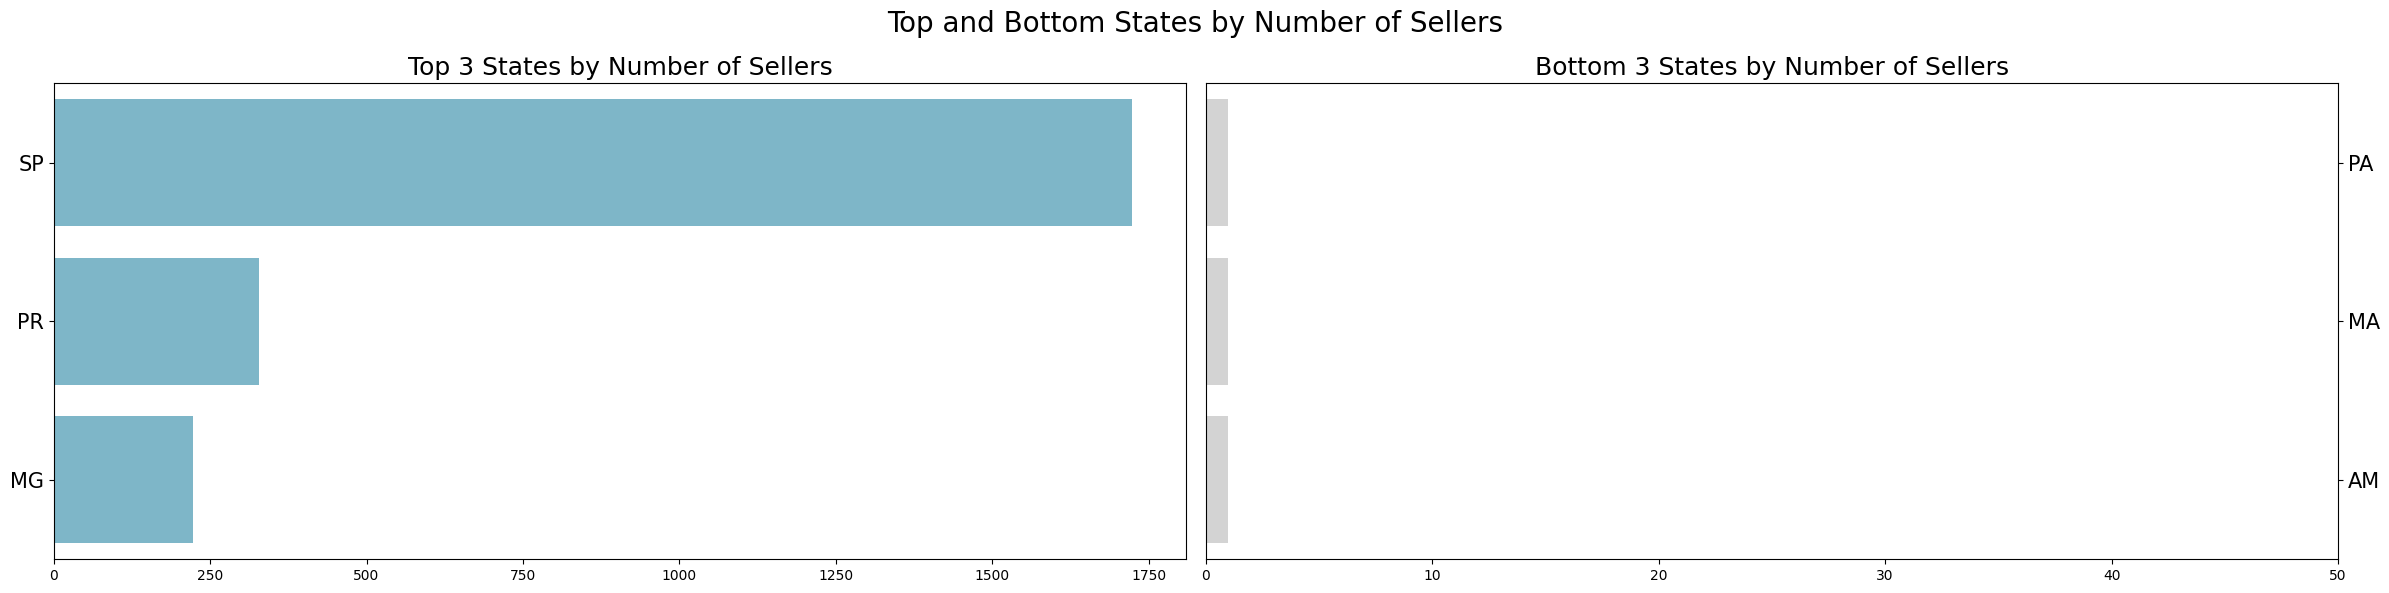

In [ ]:
# Mengelompokkan data berdasarkan 'seller_state' dan menghitung jumlah unik seller_id
seller_frequency = final_df.groupby('seller_state')['seller_id'].nunique().reset_index(name='unique_seller_count')

# Mengurutkan berdasarkan jumlah seller
seller_frequency_sorted = seller_frequency.sort_values(by='unique_seller_count', ascending=False)

# Mengambil 3 teratas dan 3 terbawah
top_3 = seller_frequency_sorted.head(3)
bottom_3 = seller_frequency_sorted.tail(3)

# Membuat figure dengan 1 baris dan 2 kolom
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk bar chart - hanya 3 warna yang diperlukan
colors_top = ["#72BCD4"] * 3
colors_bottom = ["#D3D3D3"] * 3

# Plot untuk negara bagian dengan seller tertinggi
sns.barplot(x="unique_seller_count", y="seller_state", data=top_3, palette=colors_top, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 3 States by Number of Sellers", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Plot untuk negara bagian dengan seller terendah
sns.barplot(x="unique_seller_count", y="seller_state", data=bottom_3.sort_values(by="unique_seller_count", ascending=True), palette=colors_bottom, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()  # Membalik sumbu x untuk tampilan yang lebih baik
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 3 States by Number of Sellers", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Mengatur rentang sumbu x untuk bar chart bottom
ax[1].set_xlim(0, 50)  # Rentang dari 0 sampai 20

# Menambahkan judul keseluruhan
plt.suptitle("Top and Bottom States by Number of Sellers", fontsize=20)
plt.tight_layout()  # Menyesuaikan layout agar tidak ada yang terpotong
plt.show()


**Insight**


*   Dari diagram batang ini terlihat bahwa seller paling banyak terdapat di negara bagian 'SP' sebanyak kurang lebih 1750 seller. sedangkan di negara bagian lainnya sangat jauh berbeda. hal itu terlihat dari urutan kedua dan ketiga yang jauh berbeda dibanding urutan pertama.
*   Diagram di kanan juga dapat memperlihatkan bahwa tiga negara bagian tersebut (AM, MA, PA) hanya memiliki satu seller disana



### Pertanyaan 2:

Kategori produk apa yang paling banyak dan paling sedikit terjual berdasarkan data penjualan?

<ipython-input-77-0a05b7b5a232>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="unique_order_id_count", y="product_category_name_english", data=top_3_kategori, palette=colors_top, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/se

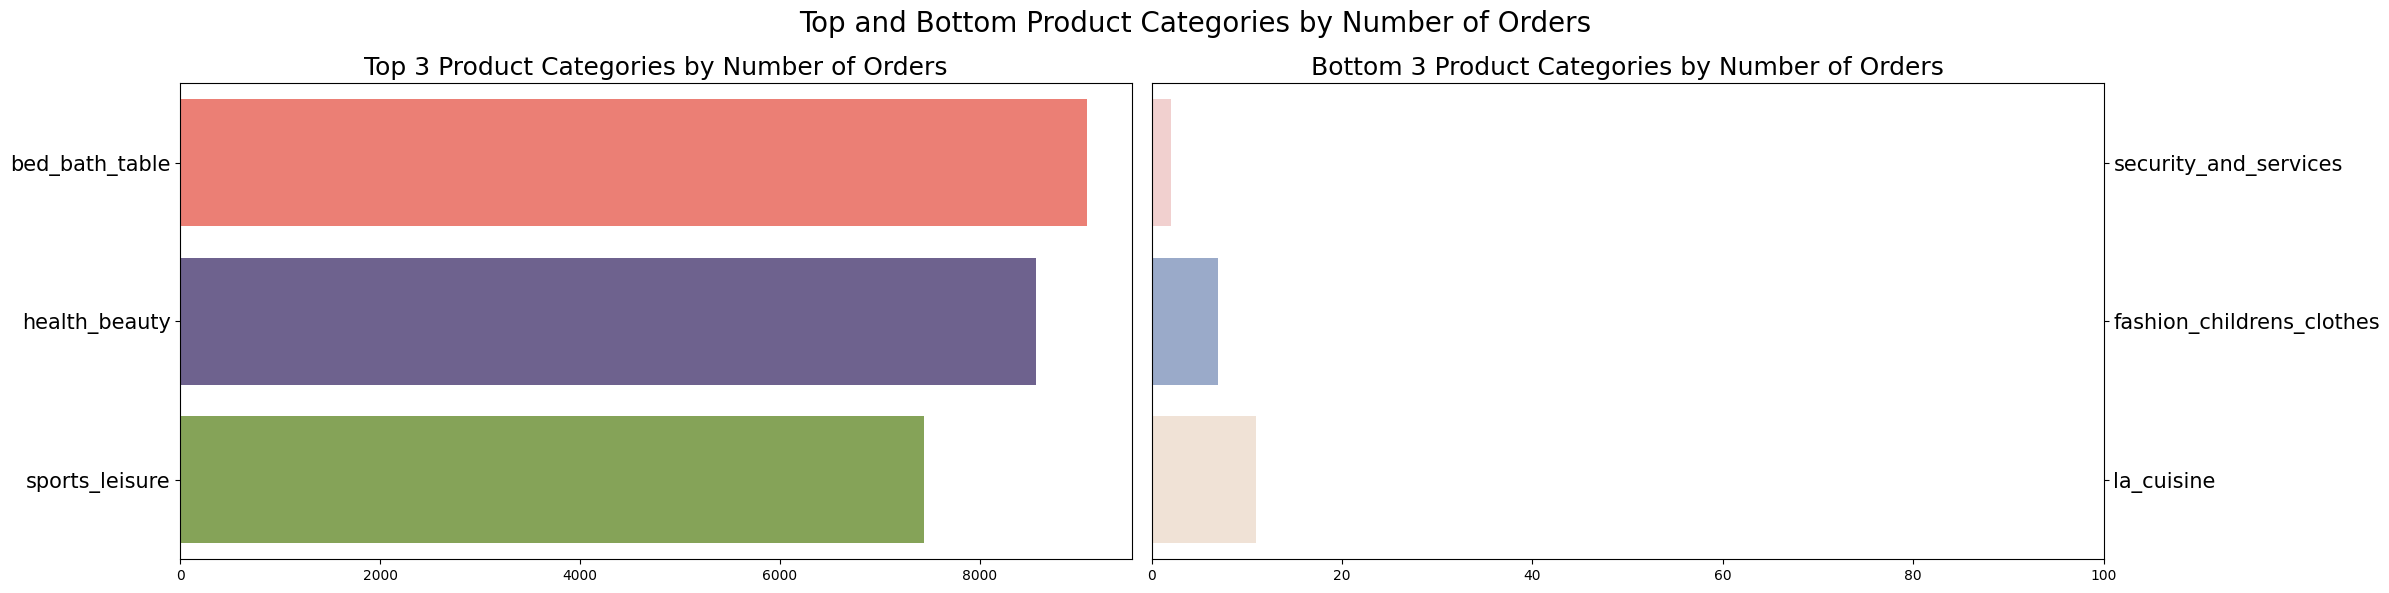

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan 'product_category_name_english' dan menghitung jumlah unik order_id
kategori_produk_frequency = final_df.groupby('product_category_name_english')['order_id'].nunique().reset_index(name='unique_order_id_count').sort_values(by='unique_order_id_count', ascending=False)

# Mengambil 3 teratas dan 3 terbawah
top_3_kategori = kategori_produk_frequency.head(3)
bottom_3_kategori = kategori_produk_frequency.tail(3)

# Membuat figure dengan 1 baris dan 2 kolom
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk bar chart - hanya 3 warna yang diperlukan
colors_top = ["#FF6F61", "#6B5B95", "#88B04B"]
colors_bottom = ["#F7CAC9", "#92A8D1", "#F4E1D2"]

# Plot untuk kategori produk dengan jumlah order tertinggi
sns.barplot(x="unique_order_id_count", y="product_category_name_english", data=top_3_kategori, palette=colors_top, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 3 Product Categories by Number of Orders", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Plot untuk kategori produk dengan jumlah order terendah
sns.barplot(x="unique_order_id_count", y="product_category_name_english", data=bottom_3_kategori.sort_values(by="unique_order_id_count", ascending=True), palette=colors_bottom, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()  # Membalik sumbu x untuk tampilan yang lebih baik
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 3 Product Categories by Number of Orders", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Mengatur rentang sumbu x untuk bar chart bottom
ax[1].set_xlim(0, 100)  # Rentang dari 0 sampai 50

# Menambahkan judul keseluruhan
plt.suptitle("Top and Bottom Product Categories by Number of Orders", fontsize=20)
plt.tight_layout()  # Menyesuaikan layout agar tidak ada yang terpotong
plt.show()


**Insight:**
- Dari ketiga kategori produk dengan penjualan tertinggi, nampak bahwa selisih diantara ketiganya tidak begitu besar. artinya ketiga kategori produk tersebut sangat tinggi penjualannya dan tidak ada yang paling mendominasi
- pada sisi kanan, nampak bahwa kategori produk dengan penjualan terendah adalah pada kategori 'security_and_services' dengan penjualan kurang dari 5

### Pertanyaan 3:

Kategori produk apa yang memiliki review score tertinggi dan terendah?

<ipython-input-71-410fa4ac98ce>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='review_score', data=top_bottom_categories, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


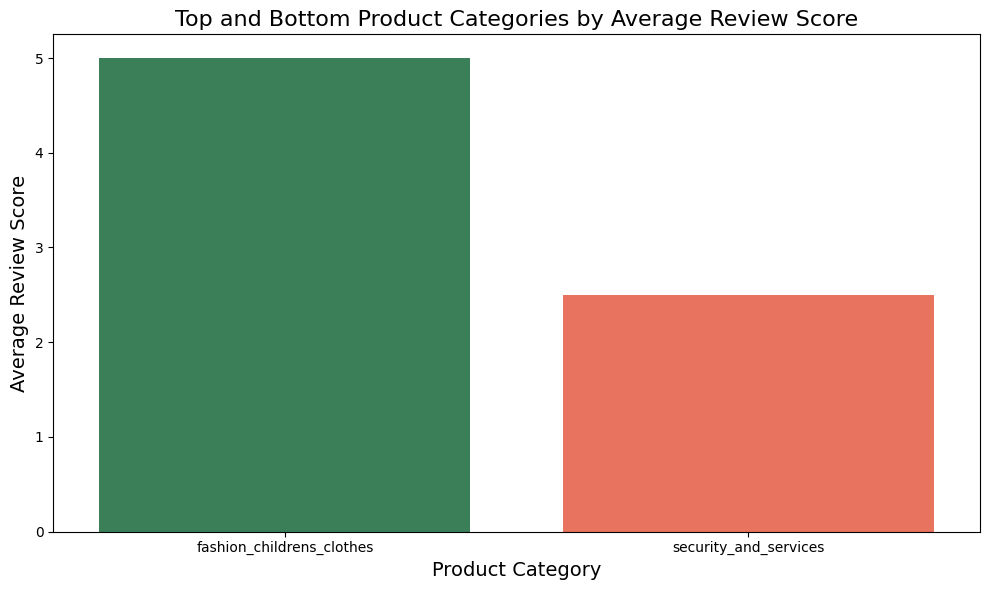

In [ ]:
# Menghitung rata-rata review_score untuk setiap product_category_name_english
average_review_scores = final_df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Mengurutkan hasil berdasarkan rata-rata review_score dari tertinggi ke terendah
average_review_scores = average_review_scores.sort_values(by='review_score', ascending=False)

# Mengambil kategori dengan rata-rata review_score tertinggi dan terendah
top_category = average_review_scores.head(1)
bottom_category = average_review_scores.tail(1)

# Menggabungkan top dan bottom category menjadi satu dataframe
top_bottom_categories = pd.concat([top_category, bottom_category])

# Membuat diagram batang vertikal
plt.figure(figsize=(10, 6))
colors = ['#2E8B57', '#FF6347']  # Warna hijau untuk top, merah untuk bottom

sns.barplot(x='product_category_name_english', y='review_score', data=top_bottom_categories, palette=colors)

# Menambahkan label dan judul
plt.ylabel('Average Review Score', fontsize=14)
plt.xlabel('Product Category', fontsize=14)
plt.title('Top and Bottom Product Categories by Average Review Score', fontsize=16)

# Menampilkan diagram
plt.tight_layout()
plt.show()

**Insight**

*   Fashion_childrens_clothes adalah kategori produk dengan nilai rata-rata review tertinggi yaitu sebesar 5
*   security_and_services adalah kategori produk dengan nilai rata-rata review terendah yaitu sebesar 2.5



### Pertanyaan 4

Negara bagian (state) mana yang memiliki jumlah customer tertinggi dan terendah?

<ipython-input-76-581c92bdc973>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="unique_customer_count", y="customer_state", data=top_3_customer_states, palette=colors_top, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_b

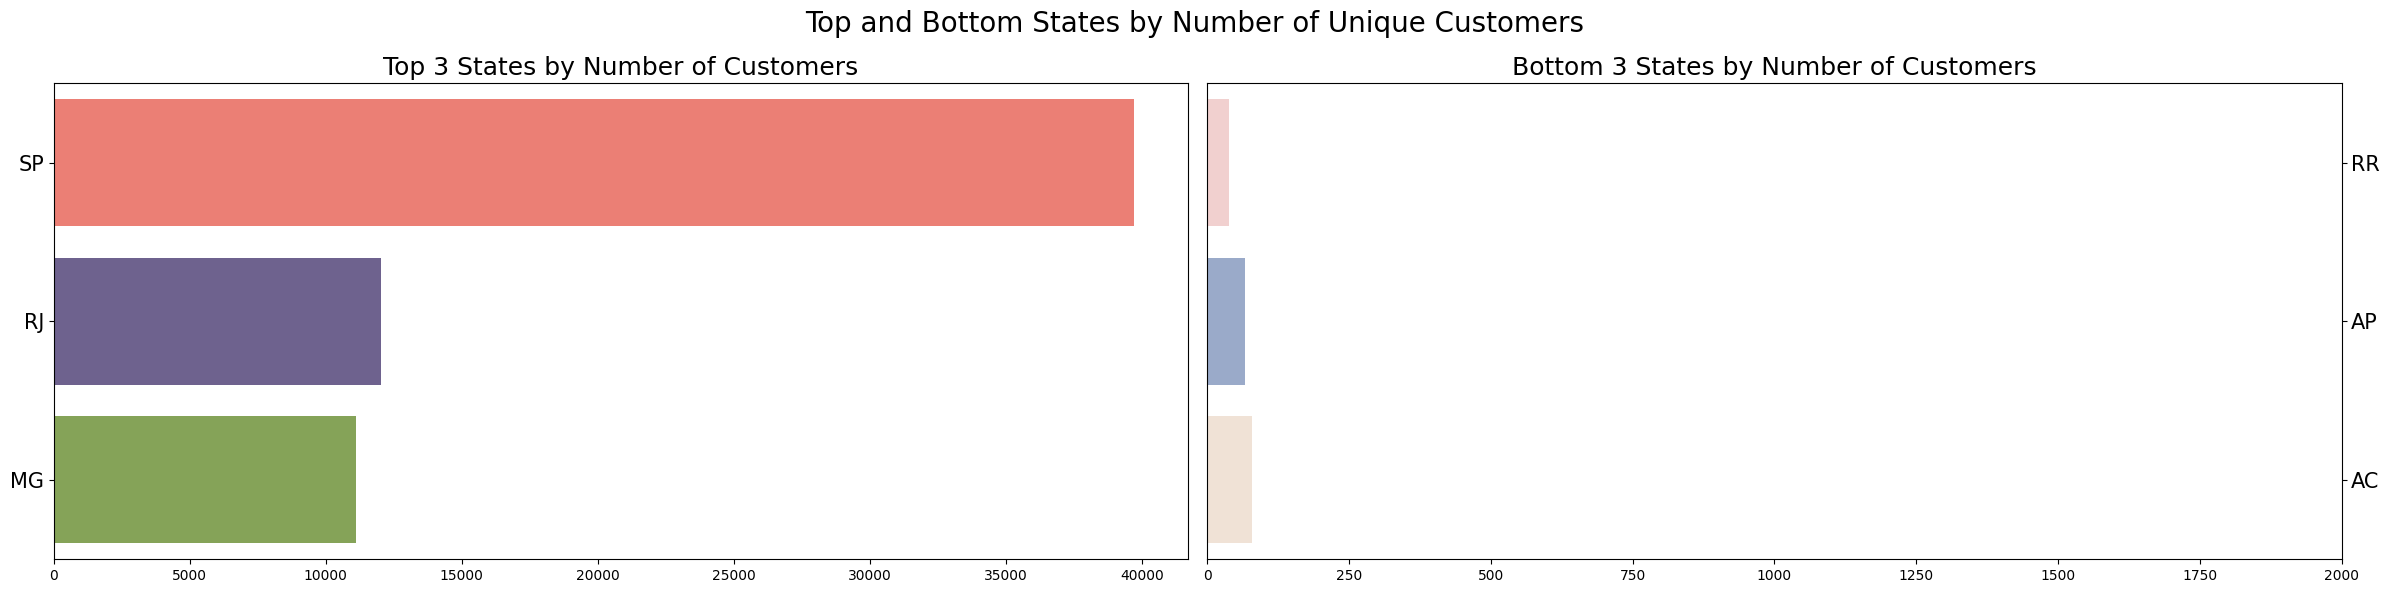

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan 'customer_state' dan menghitung jumlah unik customer_id
customer_frequency = final_df.groupby('customer_state')['customer_id'].nunique().reset_index(name='unique_customer_count').sort_values(by='unique_customer_count', ascending=False)

# Mengambil 3 negara bagian dengan jumlah customer tertinggi dan terendah
top_3_customer_states = customer_frequency.head(3)
bottom_3_customer_states = customer_frequency.tail(3)

# Membuat figure dengan 1 baris dan 2 kolom
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk bar chart - hanya 3 warna yang diperlukan
colors_top = ["#FF6F61", "#6B5B95", "#88B04B"]
colors_bottom = ["#F7CAC9", "#92A8D1", "#F4E1D2"]

# Plot untuk negara bagian dengan jumlah customer tertinggi
sns.barplot(x="unique_customer_count", y="customer_state", data=top_3_customer_states, palette=colors_top, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 3 States by Number of Customers", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Plot untuk negara bagian dengan jumlah customer terendah
sns.barplot(x="unique_customer_count", y="customer_state", data=bottom_3_customer_states.sort_values(by="unique_customer_count", ascending=True), palette=colors_bottom, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()  # Membalik sumbu x untuk tampilan yang lebih baik
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 3 States by Number of Customers", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Mengatur rentang sumbu x untuk bar chart bottom
ax[1].set_xlim(0, 2000)  # Rentang dari 0 sampai 50 (sesuaikan jika perlu)

# Menambahkan judul keseluruhan
plt.suptitle("Top and Bottom States by Number of Unique Customers", fontsize=20)
plt.tight_layout()  # Menyesuaikan layout agar tidak ada yang terpotong
plt.show()


**Insight**

*   Negara bagian dengan jumlah customer tertinggi adalah negara bagian 'SP' 'RJ' 'MG. dimana 'SP' sangat mendominasi dibandingkan negara bagian lainnya
*   Sedangkan negara bagian dengan jumlah customer terendah adalah negara baga bagian 'RR', 'AP', 'AC'



## Conclusion

- **Conclution pertanyaan 1:** berdasarkan hasil analisis dan visualisasi yang telah dibuat menggunakan bar chart, Nampak bahwa 3 negara bagian dengan jumlah seller tertinggi adalah 'SP', 'RP', dan 'MG'. dimana, seller terbanyak ada di negara bagian 'SP' dan Nampak bahwa proporsinya sangat jauh berbeda dibandingkan negara bagian kedua dan ketiga tertinggi. Hal ini dapat menjadi evaluasi bagi e-commerce untuk terus mempromosikan e-commerce nya ke negara-negara bagian lain, sehingga tidak berpusat pada satu negara bagian saja. Disisi lain, Nampak bahwa negara bagian 'PA', 'MA', dan 'AM' adalah 3 negara bagian dengan jumlah seller terendah dimana masing - masing negara bagian hanya memiliki satu seller saja.
- **Conclution pertanyaan 2:** berdasarkan hasil analisis dan visualisasi yang telah dibuat, Nampak bahwa 3 kategori produk dengan penjualan tertinggi adalah 'bed_bath_table', 'health_beauty', dan 'sports_leisure'. terlihat juga bahwa perbandingan ketiganya tidak begitu jauh berbeda. hal ini menandakan bahwa ketiga produk tersebut memiliki jumlah penjualan yang tidak jauh berbeda, sehingga strategi penjualan untuk ketiga kategori tersebut udah cukup baik. Disisi lain, 3 kategori produk dengan penjualan terendah adalah 'security_and_services', 'fashion_childerns_clothes', dan 'la_cuisine'. berdasarkan hal tersebut, perlu adanya pembaharuan strategi penjualan untuk produk - produk tersebut agar dapat meningkatkan penjualannya di kemudian hari
- **Conclution pertanyaan 3:** Berdasarkan hasil analisis dan visualisasi yang telah dibuat, Nampak bahwa kategori produk dengan rata-rata review score tertinggi adalah kategori produk 'fashion_childrens_clothes'. meskipun pada kesimpulan nomor 2 Nampak bahwa 'fashion_childrens_clothes' adalah kategori dengan penjualan terendah, namun dari sisi review score, 'fashion_childrens_clothes' menempati urutan tertinggi. berdasarkan hal tersebut, terbukti bahwa sebetulnya barang yang dijual cenderung memuaskan bagi pembeli, namun memang perlu adanya peningkatan dari segi strategi penjualannya. sedangkan 'security_and_services' menjadi kategori produk dengan review score terendah dan penjualan terendah. sehingga sangat diperlukan adanya peningkatan dari segi produk dan juga strategi penjualan
-** Conclution pertanyaan 4:** Berdasarkan hasil analisis dan visualisasi yang telah dibuat, Nampak bahwa negara bagian yang memiliki jumlah customer tertinggi adalah negara bagian 'SP', 'RJ', dan 'MG'. dari sini terlihat bahwa ternyata seller tertinggi juga menghasilkan customer tertinggi pula, karena berdasarkan jawaban pertanyaan satu Nampak bahwa seller tertinggi ada di negara bagian 'SP'. sehingga, bila e-commerce memiliki strategi untuk meningkatkan customer di sebuah negara bagian, hal tersebut pastinya dapat meningkatkan pula jumlah seller di sebuah negara bagian tersebut.

export tabel final_df

In [ ]:
final_df.to_csv("final_data.csv", index=False)